<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-11-03 16:43:06
-------------------
qualified stocks: 87
with latest results: 26
still star stocks: 16
-------------------
Initial Investment:  1.26 C
CY Investment:  1.53 C
Reserve:  1.05 L
Current:  1.45 C
-------------------
Today PnL: 67.14 K (0.46%)
Current PnL: -19.16 L (-12.56%)
CY Booked + Current PnL: -6.51 L (-4.27%)
-------------------
Total profit:  2.38 L
Total loss:  -21.55 L
-------------------
Total Booked + Current PnL: 20.47 L (16.29%)
Total Booked PnL: 39.63 L (31.55%)
Curr Year Booked PnL: 12.65 L (8.7%)
Prev Year Booked PnL: 26.98 L (21.48%)
Est FTT:  2.32 C
Est FTT PnL: 86.21 L (59.29%)
Deployed:  1.26 C
Current:  1.45 C
CAGR/XIRR %: 8.64%
Row successfully appended and saved to data/myPortfolioDB.csv.


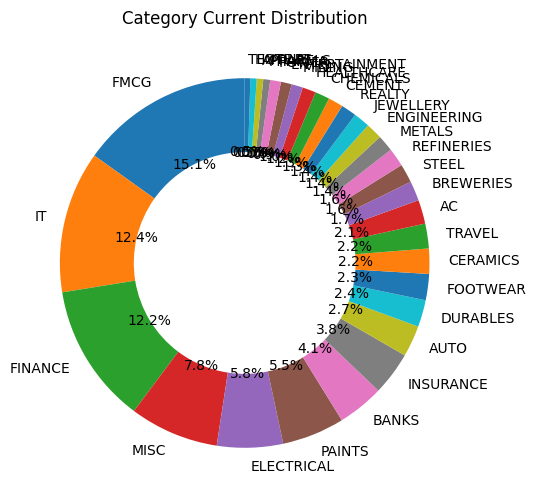

In [23]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [24]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
58,RELIANCE,1348.50,1533.00,-7.18,5.28,X-LC,67.0,231613.0,21247.0,7527.0,...,10.10,3.25,13.68,37.0,2.82,1.60,28.29,XY25,REFINERIES,NTT
78,TTKPRESTIG,769.29,770.00,106.40,1.53,M-SC,57.0,88910.0,-11867.0,11958.0,...,-11.78,13.45,0.09,245.0,-0.99,0.62,16.81,OX40N,DURABLES,NTT
79,UNIONBANK,123.87,163.00,-5.28,10.46,M-LC,67.0,171551.0,30711.0,13776.0,...,21.81,8.03,31.59,66.0,2.23,1.19,54.07,XY24,BANKS,NTT
33,ICICIGI,1839.64,2252.93,-13.37,5.05,X-MC,60.0,148562.0,12429.0,18154.0,...,9.13,12.22,22.47,91.0,0.68,1.03,23.29,X40,INSURANCE,ATH
2,ABBOTINDIA,30226.00,35195.00,-13.92,2.38,X-MC,31.0,87105.0,-3573.0,18484.0,...,-3.94,21.22,16.44,101.0,-0.19,0.60,15.44,X40,PHARMA,ATH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,2379.51,3906.00,-37.20,2.49,X-MC,54.0,187050.0,-50901.0,203548.0,...,-21.39,108.82,64.15,174.0,-0.25,1.30,4.93,XY24,CEMENT,BTT
74,TATAMOTORS,761.77,1065.00,-53.04,24.25,X-LC,19.0,148830.0,-127693.0,237771.0,...,-46.18,159.76,39.81,54.0,-0.54,1.03,4.90,XY24,AUTO,NTT
59,REPCOHOME,463.60,880.00,-53.06,6.07,H-SC,74.0,270777.0,-15728.0,273052.0,...,-5.49,100.84,89.82,134.0,-0.06,1.88,43.26,XY24,FINANCE,NTT
11,BANDHANBNK,207.88,400.00,-14.89,3.05,H-SC,40.0,211184.0,-67375.0,324822.0,...,-24.19,153.81,92.42,151.0,-0.21,1.46,22.05,XY24,BANKS,NTT


In [25]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-39.65,5.33,H-LC,53.0,252288.0,-9331.0,128541.0,...,-3.57,50.95,45.57,7.0,-0.07,1.75,7.35,AR,ELECTRICAL,NTT
2,ABBOTINDIA,30226.00,35195.00,-13.92,2.38,X-MC,31.0,87105.0,-3573.0,18484.0,...,-3.94,21.22,16.44,101.0,-0.19,0.60,15.44,X40,PHARMA,ATH
3,ACC,2379.51,3906.00,-37.20,2.49,X-MC,54.0,187050.0,-50901.0,203548.0,...,-21.39,108.82,64.15,174.0,-0.25,1.30,4.93,XY24,CEMENT,BTT
5,ANGELONE,2329.34,3033.00,18.82,5.83,X-SC,67.0,210232.0,19226.0,38472.0,...,10.07,18.30,30.21,157.0,0.50,1.46,33.05,X40N,FINANCE,NTT
6,ASIANPAINT,2861.00,3465.66,-12.32,4.75,X-LC,60.0,221074.0,-30694.0,83898.0,...,-12.19,37.95,21.13,27.0,-0.37,1.53,18.91,X40,PAINTS,ATH
9,AWL,315.97,485.00,-62.87,1.81,X-SC,64.0,262720.0,-39031.0,200455.0,...,-12.93,76.30,53.50,116.0,-0.19,1.82,16.69,XY24,FMCG,NTT
10,BAJAJHFL,122.26,181.50,-14.44,6.00,X-MC,46.0,180252.0,-20254.0,117416.0,...,-10.10,65.14,48.45,90.0,-0.17,1.25,3.94,X40N,FINANCE,ATH
12,BATAINDIA,1550.24,2096.00,-5.57,5.78,X-SC,28.0,88852.0,-39818.0,85120.0,...,-30.95,95.80,35.20,219.0,-0.47,0.62,1.98,X40,FOOTWEAR,NTT
13,BERGEPAINT,561.33,680.00,-18.54,1.33,X-MC,50.0,218295.0,-9044.0,57106.0,...,-3.98,26.16,21.14,106.0,-0.16,1.51,23.04,XY24,PAINTS,NTT
16,CAMS,3816.00,4762.00,-3.97,0.77,X-SC,52.0,257228.0,5372.0,57053.0,...,2.13,22.18,24.79,122.0,0.09,1.78,25.29,X40N,MISC,NTT


In [26]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,91.11,14.05,H-SC,28.0,129709.0,-88787.0,116985.0,...,-40.64,90.19,12.90,153.0,-0.76,0.90,0.03,OX40N,FINANCE,NTT
17,CERA,7647.97,9475.0,-20.76,2.10,H-SC,60.0,144509.0,-31394.0,73411.0,...,-17.85,50.80,23.89,149.0,-0.43,1.00,24.80,OX40N,CERAMICS,NTT
37,INDIGOPNTS,1407.73,1408.0,89.73,5.75,M-SC,34.0,124490.0,-50069.0,50107.0,...,-28.68,40.25,0.02,221.0,-1.00,0.86,8.28,OX40N,PAINTS,NTT
42,JCHAC,2282.24,2282.0,19682.61,1.57,M-SC,49.0,96645.0,-31160.0,31149.0,...,-24.38,32.23,-0.01,232.0,-1.00,0.67,9.44,OX40N,AC,NTT
45,KANSAINER,299.63,340.0,-67.36,2.73,H-SC,50.0,224235.0,-45432.0,81756.0,...,-16.85,36.46,13.47,138.0,-0.56,1.55,14.02,XY24,PAINTS,NTT
54,RAJESHEXPO,517.65,518.0,1661.36,3.79,L-SC,47.0,48042.0,-89135.0,89228.0,...,-64.98,185.73,0.07,267.0,-1.00,0.33,19.48,OX40N,JEWELLERY,NTT
64,SFL,1016.35,1287.0,41.82,5.14,M-SC,69.0,187295.0,-74923.0,144742.0,...,-28.57,77.28,26.63,229.0,-0.52,1.30,16.45,XY24,MISC,NTT
67,SIS,435.42,528.0,2004.66,3.28,H-SC,41.0,84940.0,-26092.0,49698.0,...,-23.50,58.51,21.26,156.0,-0.53,0.59,14.76,OX40N,MISC,NTT
71,SYMPHONY,1306.42,1306.0,-41.90,17.36,M-SC,62.0,123992.0,-47149.0,47092.0,...,-27.55,37.98,-0.03,196.0,-1.00,0.86,8.10,OX40N,DURABLES,NTT
73,TATAELXSI,6938.68,9161.0,-23.71,6.09,H-MC,47.0,103246.0,-28589.0,70816.0,...,-21.69,68.59,32.03,98.0,-0.40,0.72,15.64,OX40N,IT,NTT


In [27]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
3,ACC,2379.51,3906.00,-37.20,2.49,X-MC,54.0,187050.0,-50901.0,203548.0,...,-21.39,108.82,64.15,174.0,-0.25,1.30,4.93,XY24,CEMENT,BTT
8,ATULAUTO,579.80,844.00,3527.03,3.65,M-SC,44.0,162962.0,-34170.0,123998.0,...,-17.33,76.09,45.57,236.0,-0.28,1.13,15.54,XY24,AUTO,NTT
9,AWL,315.97,485.00,-62.87,1.81,X-SC,64.0,262720.0,-39031.0,200455.0,...,-12.93,76.30,53.50,116.0,-0.19,1.82,16.69,XY24,FMCG,NTT
11,BANDHANBNK,207.88,400.00,-14.89,3.05,H-SC,40.0,211184.0,-67375.0,324822.0,...,-24.19,153.81,92.42,151.0,-0.21,1.46,22.05,XY24,BANKS,NTT
13,BERGEPAINT,561.33,680.00,-18.54,1.33,X-MC,50.0,218295.0,-9044.0,57106.0,...,-3.98,26.16,21.14,106.0,-0.16,1.51,23.04,XY24,PAINTS,NTT
15,CAMPUS,294.86,393.00,-23.49,4.87,M-SC,53.0,159377.0,-8398.0,64245.0,...,-5.01,40.31,33.28,210.0,-0.13,1.10,23.53,XY24,FOOTWEAR,NTT
18,COALINDIA,406.65,497.97,7.30,2.51,L-LC,51.0,143764.0,-6696.0,40484.0,...,-4.45,28.16,22.46,167.0,-0.17,1.00,12.82,XY25,MINING,ATH
20,COLPAL,2633.65,3726.84,-5.54,7.40,X-MC,44.0,220040.0,-43325.0,152642.0,...,-16.45,69.37,41.51,84.0,-0.28,1.52,3.26,XY25,FMCG,ATH
21,DABUR,511.48,735.00,-9.71,3.28,X-MC,50.0,244100.0,-3968.0,112384.0,...,-1.60,46.04,43.70,102.0,-0.04,1.69,12.62,XY24,FMCG,BTT
24,EASEMYTRIP,18.12,26.40,-19.77,27.38,M-SC,39.0,77186.0,-99629.0,180422.0,...,-56.35,233.75,45.70,197.0,-0.55,0.53,0.76,XY24,TRAVEL,NTT


In [28]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-39.65,5.33,H-LC,53.0,252288.0,-9331.0,128541.0,...,-3.57,50.95,45.57,7.0,-0.07,1.75,7.35,AR,ELECTRICAL,NTT
4,ALKYLAMINE,2347.98,4546.37,-13.74,4.95,H-SC,45.0,81292.0,-19671.0,114207.0,...,-19.48,140.49,93.63,148.0,-0.17,0.56,21.08,SR,CHEMICALS,ATH
7,ASIANTILES,75.41,137.00,7388.89,9.00,L-SC,68.0,82179.0,-11631.0,88252.0,...,-12.40,107.39,81.67,269.0,-0.13,0.57,59.14,XR,CERAMICS,NTT
14,BSOFT,551.58,836.99,-15.57,12.18,H-SC,55.0,95038.0,-45615.0,118389.0,...,-32.43,124.57,51.74,131.0,-0.39,0.66,9.96,XR,IT,ATH
19,COFFEEDAY,59.14,80.00,-45.67,28.39,L-SC,44.0,79219.0,-34330.0,74379.0,...,-30.23,93.89,35.27,268.0,-0.46,0.55,93.89,XR,HOTELS,NTT
22,DEN,52.79,75.00,91.71,4.05,M-SC,47.0,53760.0,-30704.0,66238.0,...,-36.35,123.21,42.07,237.0,-0.46,0.37,14.17,AR,ENTERTAINMENT,NTT
26,HAPPSTMNDS,801.03,1488.71,-23.94,16.80,H-SC,44.0,81936.0,-46229.0,156260.0,...,-36.07,190.71,85.85,132.0,-0.30,0.57,4.60,AR,IT,ATH
27,HATHWAY,18.12,31.40,856.52,7.81,H-SC,42.0,82320.0,-26400.0,106078.0,...,-24.28,128.86,73.29,161.0,-0.25,0.57,10.11,XR,ENTERTAINMENT,NTT
35,IEX,147.35,219.00,-33.63,16.19,H-SC,46.0,189994.0,-9960.0,107195.0,...,-4.98,56.42,48.63,115.0,-0.09,1.32,6.00,XR,MISC,NTT
36,INDIAMART,2327.09,4810.62,-53.15,6.33,H-SC,56.0,130740.0,7404.0,124216.0,...,6.00,95.01,106.72,119.0,0.06,0.91,30.78,AR,MISC,ATH


In [29]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.63
1,20,36.46
2,30,51.25


In [30]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,45.97
LC,31.23
MC,22.78


In [31]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,29.98
X40,16.08
X40N,12.44
XY25,11.91
XR,9.96
AR,7.82
OX40N,6.55
X200,1.78
X5K,1.45


In [32]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,24.46
X-LC,20.51
X-MC,18.47
M-SC,12.69
X-SC,7.37
M-LC,5.11
H-LC,4.61
H-MC,2.35
M-MC,1.65


In [33]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          9.79
X40       X-LC          8.76
          X-MC          6.70
XY24      M-SC          6.18
XR        H-SC          6.13
XY25      X-LC          5.35
X40N      X-SC          4.57
XY24      X-MC          4.50
X40N      X-MC          4.33
AR        H-SC          4.04
X40N      X-LC          3.54
OX40N     M-SC          3.01
XY25      X-MC          2.94
XY24      X-LC          2.86
AR        H-LC          2.83
OX40N     H-SC          2.49
XY24      X-SC          2.18
X200      H-LC          1.78
XY24      M-MC          1.65
          H-MC          1.63
X5K       M-LC          1.45
XY25      M-LC          1.44
XR        M-SC          1.37
XY24      M-LC          1.19
XY25      M-SC          1.18
XR        L-SC          1.12
SR        H-SC          1.07
XR        M-LC          1.03
XY25      L-LC          1.00
AR        M-SC          0.95
MH        H-SC          0.94
OX40N     H-MC          0.72
X40       X-SC          0.62
OX40N     L-SC          0.33
XR        L-MC          0.31
Name: CurrAlloc%, dtype: float64

In [34]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,15.11,-3.65,37.16
IT,12.42,-17.29,80.20
FINANCE,12.24,-7.04,55.56
MISC,7.82,-15.36,73.55
ELECTRICAL,5.77,-8.49,46.95
PAINTS,5.45,-17.16,34.62
BANKS,4.05,-15.29,82.35
INSURANCE,3.81,-0.75,38.31
AUTO,2.74,-45.15,105.73


In [35]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,75.02,10832448.0,-8.76,-948488.0,50.62,5483509.0


In [36]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,57.38,8285383.0,-5.81,-481615.0,41.64,3450390.0


In [37]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3246079.0
XR,1218786.0
AR,1159659.0
X40,833896.0
X40N,673887.0
OX40N,540444.0
XY25,456520.0
SR,267019.0
X5K,108556.0


In [38]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3303299.0
M-SC,1211437.0
X-LC,1032849.0
X-MC,1026257.0
X-SC,750119.0
H-LC,273127.0
M-LC,270376.0
L-SC,251859.0
H-MC,248667.0


In [39]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1158514.0
AR        H-SC           830738.0
XR        H-SC           758488.0
XY24      M-SC           696301.0
X40       X-LC           459178.0
XY24      X-MC           373038.0
          X-SC           364834.0
          X-LC           306741.0
X40N      X-SC           300165.0
X40       X-MC           289598.0
SR        H-SC           267019.0
OX40N     H-SC           240094.0
AR        H-LC           205743.0
X40N      X-LC           187387.0
          X-MC           186335.0
XY24      H-MC           177851.0
XY25      X-MC           177286.0
XR        L-SC           162631.0
XY24      M-MC           155024.0
OX40N     M-SC           140306.0
XR        M-SC           129193.0
AR        M-SC           123178.0
XY25      M-SC           122459.0
XR        M-LC           111296.0
X5K       M-LC           108556.0
OX40N     L-SC            89228.0
X40       X-SC            85120.0
XY25      X-LC            79543.0
OX40N     H-MC            70816.0
X200      H-LC            67384.0
XR        L-MC            57178.0
MH        H-SC            48446.0
XY25      L-LC            40484.0
          M-LC            36748.0
XY24      M-LC            13776.0
Name: FTT Amt, dtype: float64

In [40]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,24
M-SC,15
X-MC,14
X-LC,12
X-SC,7
M-LC,4
H-LC,3
L-SC,3
H-MC,2
